In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import glob
import holoviews
from isochrones import *

PyMultiNest not imported.  MultiNest fits will not work.


In [2]:
# --- Plot Parameters ---- 
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 100
# plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': True,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
colour_arrays = ['red', 'blue', 'green', 'crimson', 'lime']

['CCD_/king1.txt', 'CCD_/stock18.txt', 'CCD_/king15.txt', 'CCD_/Berkeley20.txt', 'CCD_/Berkeley34.txt']


/var/folders/9k/zxw1zx552m142q6419p6yn7c0000gn/T/ipykernel_3443/2143428635.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()
/var/folders/9k/zxw1zx552m142q6419p6yn7c0000gn/T/ipykernel_3443/2143428635.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.colorbar()


Text(0, 0.5, 'V [mag]')

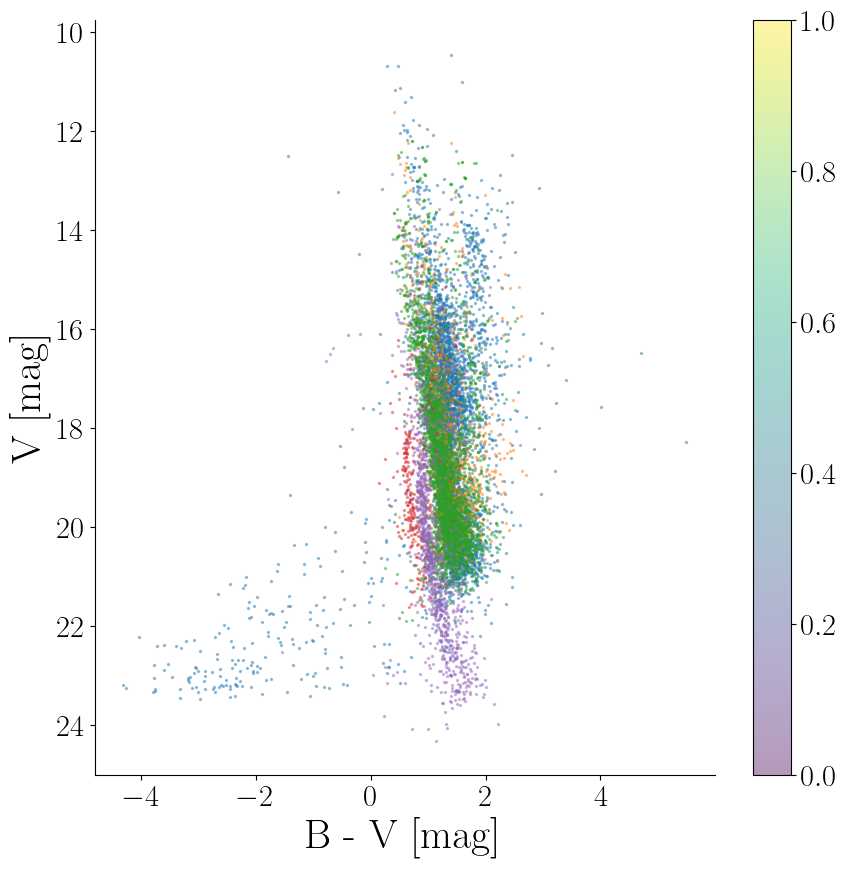

In [3]:
cluster_filename = glob.glob('CCD_/*.txt'); print(cluster_filename)

fig, ax = plt.subplots()

for filename in cluster_filename: 
    B, BV = np.loadtxt(filename, skiprows=5, usecols=(2,3), unpack=True)
    plt.scatter(BV, B, s = 2, alpha=0.4)

plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('B - V [mag]'); plt.ylabel('V [mag]') 

# Isochrone Testing

In [9]:
from isochrones.mist import MISTEvolutionTrackGrid

grid_tracks = MISTEvolutionTrackGrid()
print(len(grid_tracks.df))
grid_tracks.df.head()

3619652


radius      Mbol      nu_max      logL  \
initial_feh initial_mass EEP                                             
-4.0        0.1          1    1.593804  5.132871  143.524548 -0.157148   
                         2    1.583455  5.147664  145.419039 -0.163066   
                         3    1.572790  5.163015  147.409881 -0.169206   
                         4    1.561817  5.178922  149.499346 -0.175569   
                         5    1.550499  5.195452  151.703570 -0.182181   

                               logTeff  mass       feh      logg  eep  \
initial_feh initial_mass EEP                                            
-4.0        0.1          1    3.620834   0.1 -3.978406  3.033277  1.0   
                         2    3.620769   0.1 -3.978406  3.038935  2.0   
                         3    3.620702   0.1 -3.978406  3.044805  3.0   
                         4    3.620631   0.1 -3.978406  3.050886  4.0   
                         5    3.620558   0.1 -3.978406  3.057203  5.0   

                               density  phase  initial_mass   delta_nu  \
initial_feh initial_mass EEP                                             
-4.0        0.1          1    0.034821   -1.0           0.1  21.776686   
                         2    0.035509   -1.0           0.1  21.993078   
                         3    0.036236   -1.0           0.1  22.219791   
                         4    0.037005   -1.0           0.1  22.457004   
                         5    0.037821   -1.0           0.1  22.706349   

                                     Teff  interpolated      star_age  \
initial_feh initial_mass EEP                                            
-4.0        0.1          1    4176.707371         False  13343.289397   
                         2    4176.085183         False  14171.978264   
                         3    4175.435381         False  15048.910447   
                         4    4174.757681         False  15975.827275   
                         5    4174.049081         False  16962.744747   

                                   age   dt_deep  
initial_feh initial_mass EEP                      
-4.0        0.1          1    4.125263  0.026168  
                         2    4.151430  0.026121  
                         3    4.177505  0.026016  
                         4    4.203463  0.025996  
                         5    4.229496  0.025996

In [10]:
from isochrones.mist import MISTIsochroneGrid

grid = MISTIsochroneGrid()
print(len(grid.df))
grid.df.head()  # Just the first few rows

/Users/oj/.isochrones/mist/MIST_v1.2_vvcrit0.4_full_isos.txz corrupted; deleting and re-downloading.
/Library/anaconda3/envs/isochrones/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/anaconda3/envs/isochrones/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/anaconda3/envs/isochrones/lib/python3.10/site-packages/isochrones/models.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.loc[:, "dm_deep"] = deriv


1494453


eep  age       feh      mass  initial_mass  \
log10_isochrone_age_yr feh  EEP                                               
5.0                    -4.0 35    35  5.0 -3.978406  0.100000      0.100000   
                            36    36  5.0 -3.978406  0.102885      0.102885   
                            37    37  5.0 -3.978406  0.107147      0.107147   
                            38    38  5.0 -3.978406  0.111379      0.111379   
                            39    39  5.0 -3.978406  0.115581      0.115581   

                                   radius   density   logTeff         Teff  \
log10_isochrone_age_yr feh  EEP                                              
5.0                    -4.0 35   1.106082  0.104181  3.617011  4140.105252   
                            36   1.122675  0.102504  3.618039  4149.909661   
                            37   1.147702  0.099918  3.619556  4164.436984   
                            38   1.173015  0.097284  3.621062  4178.903372   
                            39   1.198615  0.094623  3.622555  4193.289262   

                                     logg      logL      Mbol   delta_nu  \
log10_isochrone_age_yr feh  EEP                                            
5.0                    -4.0 35   3.350571 -0.489734  5.964335  37.987066   
                            36   3.347798 -0.472691  5.921728  37.739176   
                            37   3.343658 -0.447471  5.858678  37.345115   
                            38   3.339612 -0.422498  5.796244  36.923615   
                            39   3.335660 -0.397776  5.734440  36.473151   

                                     nu_max  phase   dm_deep  
log10_isochrone_age_yr feh  EEP                               
5.0                    -4.0 35   299.346079   -1.0  0.002885  
                            36   298.570836   -1.0  0.003573  
                            37   297.180748   -1.0  0.004247  
                            38   295.526946   -1.0  0.004217  
                            39   293.589960   -1.0  0.004189

In [11]:
from isochrones import get_ichrone
mist = get_ichrone('mist')
eep = mist.get_eep(1.01, 9.76, 0.03, accurate=True)
mist.interp_value([eep, 9.76, 0.03], ['Teff', 'logg', 'radius', 'density'])

array([5.86016011e+03, 4.36634798e+00, 1.09151255e+00, 1.09586118e+00])

In [12]:

mist.interp_mag([eep, 9.76, 0.03, 200, 0.1], bands=['G', 'BP', 'RP'])

/Library/anaconda3/envs/isochrones/lib/python3.10/site-packages/tables/attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: 'axis1_name[Fe/H]'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/Library/anaconda3/envs/isochrones/lib/python3.10/site-packages/tables/attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: 'axis1_name[Fe/H]'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


(5860.16011294621,
 4.366347981387894,
 -0.005536922088842331,
 array([10.99262056, 11.3150314 , 10.50313534]))